In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
import statsmodels.api as sm

In [9]:
df = pd.read_csv('../data/AdSmartABdata.csv')
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [11]:
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 8077 rows and 9 columns


In [12]:
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

# Data Exploration

In [13]:
df['yes'].value_counts()

0    7505
1     572
Name: yes, dtype: int64

In [14]:
df['no'].value_counts()

0    7406
1     671
Name: no, dtype: int64

In [20]:
# def yesno(df):
#     count = 0
#     if df['yes'] == df['no']:
#         count = count + 1
#     return count
# yesno(df)

In [21]:
df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [22]:
df['device_make'].value_counts()

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
Samsung SM-A505F          1
D5803                     1
Samsung SM-G6100          1
HTC M10h                  1
XiaoMi Redmi Note 5       1
Name: device_make, Length: 270, dtype: int64

In [23]:
df['auction_id'].value_counts()

0008ef63-77a7-448b-bd1e-075f42c55e39    1
aa14b324-5c46-4b3a-8e75-18d78968495b    1
aa84454c-a749-4c98-bf9f-1f99c04416af    1
aa6ecb40-6a48-4c06-a611-4c9aa9023ea8    1
aa6c6cda-e498-4e8f-b886-1d969bd376ea    1
                                       ..
56c87344-e876-41a3-9011-feb8f7e58cd5    1
56bf959a-642f-4814-bf08-55d634554d5a    1
56bd072c-a748-4355-b2d1-258d82d401b0    1
56bb25c7-f778-4690-90be-034b1982fe03    1
fffbb9ff-568a-41a5-a0c3-6866592f80d8    1
Name: auction_id, Length: 8077, dtype: int64

In [31]:
df['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

In [32]:
# Prints Summary of Numerical Data
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [36]:
# Importing the warning library to ignore the warning messages that are not that much important

import warnings
warnings.filterwarnings('ignore')

In [37]:
# Prints Summary of Categorical Data
df.describe(include=[np.object])

,auction_id,experiment,date,device_make,browser
count,8077,8077,8077,8077,8077
unique,8077,2,8,270,15
top,0008ef63-77a7-448b-bd1e-075f42c55e39,control,2020-07-03,Generic Smartphone,Chrome Mobile
freq,1,4071,2015,4743,4554


In [39]:
# showing the experiment unique values
df['experiment'].unique()

array(['exposed', 'control'], dtype=object)

In [41]:
# showing the device unique values
# df['device_make'].unique()

In [50]:
user_grp = df.groupby(['experiment']) 
user_grp.value_counts()

experiment  auction_id                            date        hour  device_make         platform_os  browser                yes  no
control     00187412-2932-4542-a8ef-3633901c98d9  2020-07-03  15    Samsung SM-A705FN   6            Facebook               0    0     1
            fd1b8ea5-5397-4fae-a7f6-3c11fa3cef70  2020-07-03  15    Samsung SM-G975F    6            Samsung Internet       1    0     1
            ff07272c-a61c-4e8f-99fc-7159bd2bcab1  2020-07-03  15    Samsung SM-A105FN   6            Chrome Mobile WebView  0    0     1
            ffea3210-2c3e-426f-a77d-0aa72e73b20f  2020-07-03  15    Generic Smartphone  6            Chrome Mobile          0    0     1
            ffcea781-a6e7-4f98-9d90-f95377270476  2020-07-03  15    Samsung SM-N976B    6            Facebook               0    0     1
                                                                                                                                      ..
exposed     a9b2b55e-16e0-4715-ad8a-5bfca764b0

<AxesSubplot:>

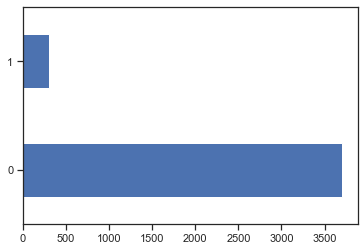

In [52]:
user_grp.get_group('exposed')['yes'].value_counts()[0:5].plot(kind='barh')

In [57]:
user_grp['yes'].value_counts()

experiment  yes
control     0      3807
            1       264
exposed     0      3698
            1       308
Name: yes, dtype: int64

### This graph shows from the exposed users who takes the new advert quiz only around 308 of the users says yes and the rest says no

<AxesSubplot:>

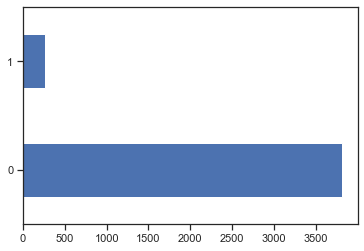

In [54]:
user_grp.get_group('control')['yes'].value_counts()[0:5].plot(kind='barh')

<AxesSubplot:>

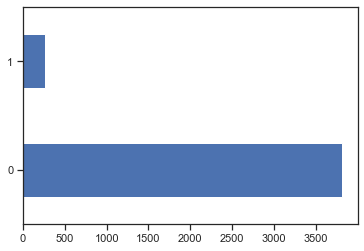

In [55]:
user_grp.get_group('control')['yes'].value_counts()[0:5].plot(kind='barh')

### This graph shows from the control users who takes the dummy add only around 264 of the users says yes and the rest says no

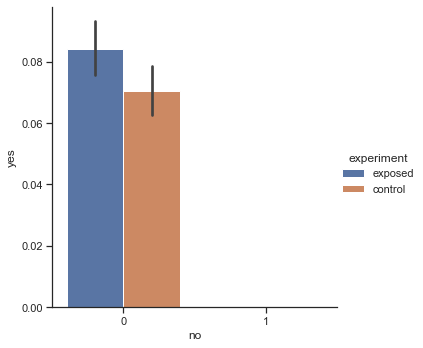

In [61]:
sns.catplot(x="no", y="yes", hue="experiment", kind="bar", data=df)

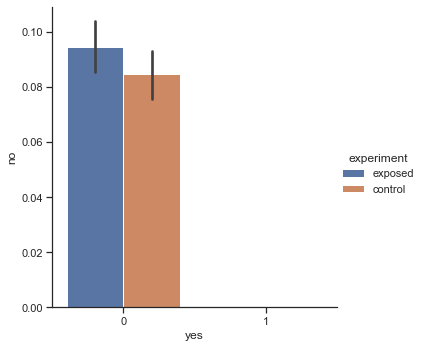

In [63]:
sns.catplot(x="yes", y="no", hue="experiment", kind="bar", data=df)

(array([4006.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 4071.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

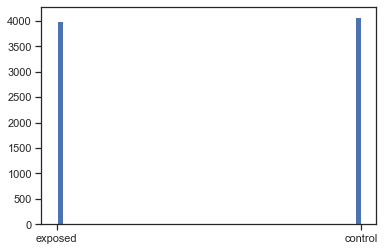

In [72]:
plt.hist(df['experiment'], bins=50)

### This graph shows the control user are a little bit higer than the exposed users

# A/B HYPOTHESIS TESTING

#### Spliting numerical and categorical data

In [73]:
numerical_column = df.select_dtypes(exclude="object").columns.tolist()
categorical_column = df.select_dtypes(include="object").columns.tolist()
print("Numerical Columns:", numerical_column)
print("****************")
print("Categorical Columns:", categorical_column)

Numerical Columns: ['hour', 'platform_os', 'yes', 'no']
****************
Categorical Columns: ['auction_id', 'experiment', 'date', 'device_make', 'browser']


##  The test given for the two groups
control user =>  who have been shown the dummy ad
exposed user => users who have been shown a creative (ad) that was designed by SmartAd for the client. 

NUll HYPOTHESIS = NO
ALTERNATE HYTPOTHESIS = YES

In [80]:
### FIND THE MEAN VALUE FOR THE NULL HYPOTHESIS
df['no'].mean()

0.0830753992819116

In [77]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


### 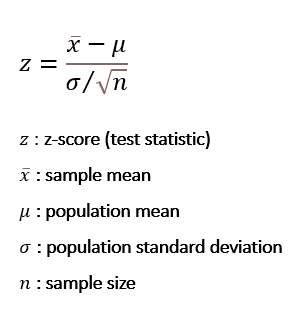

The most common value for alpha is 5%, i.e. 0.05

#value of z at 0.05 making it .025 for 2 sided we know from z-table +_ 1.96

In [79]:
sampData=df['no'][np.argsort(np.random.random(1000))[:70]]

In [81]:
meanSampData=sampData.mean()
hypMean=0.083075
N=70
standPop=np.std(df['no'])

In [84]:
import math
z = (meanSampData-hypMean)/(standPop/math.sqrt(N))
z

0.08000781240939031

. as calculated z score 0.08 is less than 1.96 (tabular z score), we reject the null hypothesis

. if also we would have got -0.08 is less than -1.96 we would have rejected the Null hypothesis

. Observed value = 0.08

. Critical value = 1.96

## p-value (observed significance level)
The p-value defines the smallest probability (alpha) for which the null hypothesis can be rejected.
let say alpha is 0.05

In [ ]:
as observed z value is 0.08 from the ztable the probabilty of z is .0808
p-value = 1-0.0808